In [1]:
import pandas as pd

cat = pd.read_csv('../data/cats.csv')
cat

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [2]:
from scipy.stats import shapiro
shapiro(cat['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [5]:
from scipy.stats import wilcoxon
wilcoxon(cat['Bwt'] - 2.6, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [6]:
data = {'before': [7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
        'after' : [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [7]:
from scipy.stats import shapiro

print('before \t', shapiro(data['before']))
print('after \t', shapiro(data['after']))

before 	 ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)
after 	 ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)


In [9]:
from scipy.stats import ttest_rel

ttest_rel(data['before'], data['after'], alternative='less')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0005269356285082764)

In [10]:
cat

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [17]:
female = cat.loc[cat['Sex'] == 'F', 'Bwt']
male = cat.loc[cat['Sex'] == 'M', 'Bwt']



In [18]:
print('female \t', shapiro(female))
print('male \t', shapiro(male))

female 	 ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)
male 	 ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)


In [19]:
from scipy.stats import levene
levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [20]:
from scipy import stats

stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [21]:
iris = pd.read_csv('../data/iris.csv')

In [25]:
target_list = iris['target'].unique()

setosa = iris.loc[iris['target']==target_list[0], 'sepal width']
versicolor = iris.loc[iris['target']==target_list[1], 'sepal width']
virginica = iris.loc[iris['target']==target_list[2], 'sepal width']

<AxesSubplot:xlabel='target', ylabel='sepal width'>

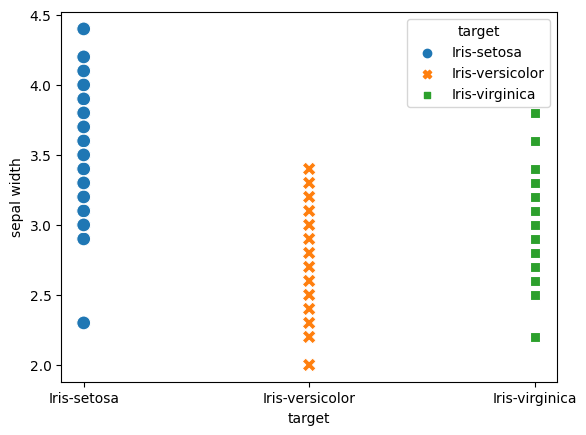

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=iris['target'], y=iris['sepal width'],
               hue=iris['target'], style=iris['target'],
               s=100)

In [32]:
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [33]:
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [34]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

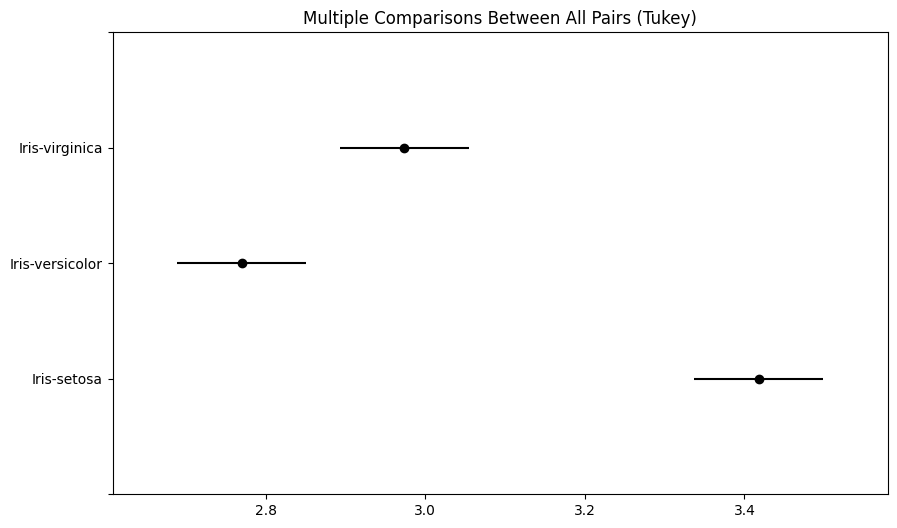

In [36]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)

fig = tuekeyhsd.plot_simultaneous()

In [37]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [38]:
mtcars = pd.read_csv('../data/mtcars.csv')
mtcars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [39]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


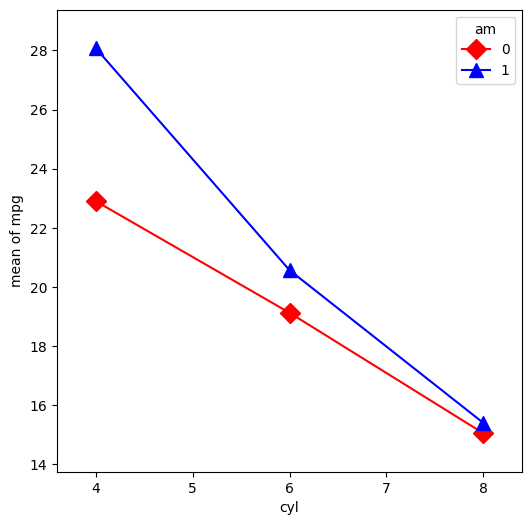

In [41]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl, am, mpg, 
                       colors=['red', 'blue'], 
                       markers=['D', '^'], ms=10, ax=ax)

                       

In [44]:
df = pd.read_csv('../data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [45]:
df = df[df['survived']==1]
table = df[['sex']].value_counts()

In [52]:
from scipy.stats import chisquare
chisquare(f_obs=table, f_exp=[171, 171])

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)

In [54]:
df = pd.read_csv('../data/titanic.csv')
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [57]:
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table)
print('stat \t', chi)
print('p \t', p)
print('df \t', df)
print('expect \n', expect)

stat 	 102.88898875696056
p 	 4.549251711298793e-23
df 	 2
expect 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [58]:
house = pd.read_csv('../data/kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


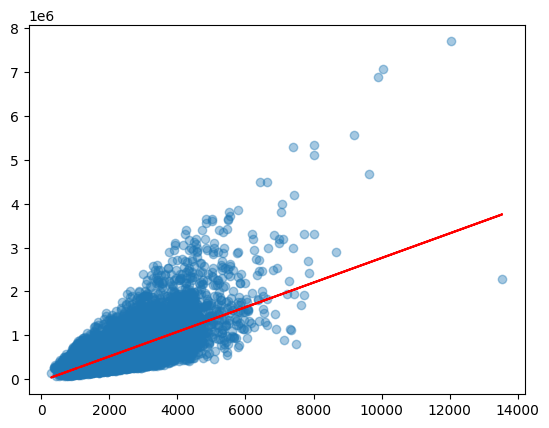

In [64]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

y = house['price']
X = house[['sqft_living']]

lr = ols('price~sqft_living', data=house).fit()

y_pred = lr.predict(X)
plt.scatter(X, y, alpha=.4)
plt.plot(X, y_pred, c='r')

In [66]:
lr.summary()
# R2는 0.493으로 전체 변동의 49.3%를 설명한다.
# p-value는 0.05이하로 이 모델은 유의미 하다.
# sqft_living의 p-value ㅈ또한 0.05이하로 변수도 유의미함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:42:43   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
car = pd.read_csv('../data/Cars93.csv')
car

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,-2147483648,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


In [72]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

car.columns = car.columns.str.replace('.', '')
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway'
model = smf.ols(formula=formula, data=car)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           4.88e-14
Time:                        14:49:49   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
feature = 'EngineSize + RPM + Weight + Length + MPGcity + MPGhighway'.split(' + ')

<AxesSubplot:>

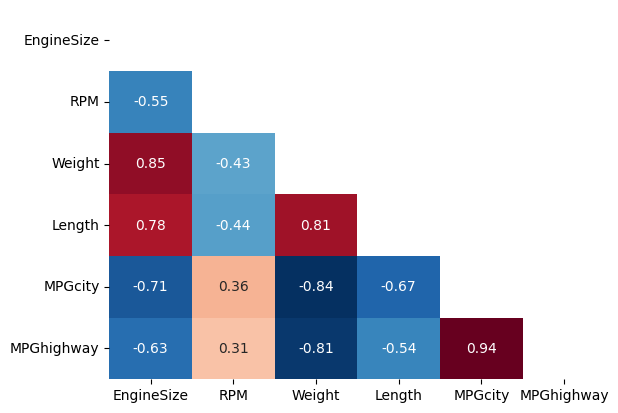

In [85]:
mask = np.triu(np.ones(car[feature].corr().shape, dtype='bool'))
sns.heatmap(car[feature].corr(),
           annot=True, cmap='RdBu_r',
           cbar=False, mask=mask)

In [111]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices(formula, data=car, return_type='dataframe')

vif_list = []
for i in range(1, len(X.columns)):
    vif = variance_inflation_factor(X.values, i)
    vif_list.append([vif, X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [115]:
model = smf.ols(formula='Price ~ EngineSize + RPM + Weight + Length + MPGhighway',
               data=car)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.28e-14
Time:                        15:04:37   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
X.columns

Index(['Intercept', 'EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity',
       'MPGhighway'],
      dtype='object')

In [142]:
import time
import itertools

def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model': regr, 'AIC': AIC}

def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) \
                            if p not in predictors]
    results = []
    for p in remaining_predictors:
        result = processSubset(X=X, y=y, feature_set=predictors + [p] + ['Intercept'])
        results.append(result)
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    print('Processed ', models.shape[0], 'models on', len(predictors) + 1, 'predictors in')
    print('Selected predictors :', best_model['model'].model.exog_names, 'AIC :', best_model[0].aic)
    
    return best_model

def backward(X, y, predictors):
    start_time = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        result = processSubset(X=X, y=y, feature_set = list(combo) + ['Intercept'])
        results.append(result)
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    end_time = time.time()
    time_taken = end_time - start_time
    
    print('Processed ', models.shape[0], 'models on', len(predictors) -1, 'predictors in', time_taken)
    print('Selected predictors :', best_model['model'].model.exog_names, 'AIC :', best_model[0].aic)
    
    return best_model

def stepwise_model(X, y):
    stepmodels = pd.DataFrame(columns = ['AIC', 'model'])
    start_time = time.time()
    predictors = []
    smodel_before = processSubset(X, y, predictors+['Intercept'])['AIC']
    
    for i in range(1, len(X.columns.difference(['Intercept'])) + 1 ):
        forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k!= 'Intercept']
        backward_result = backward(X=X, y=y, predictors=predictors)
        
        if backward_result['AIC'] < forward_result['AIC']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]['model'].model.exog_names
            smodel_before = stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k!='Intercept']
            print('backward')
        
        if stepmodels.loc[i]['AIC'] > smodel_before:
            break
        else:
            smodel_before = stepmodels.loc[i]['AIC']
            
    end_time = time.time()
    print('Total elapsed time:', round(end_time - start_time, 5), 'seconds')
    
    return (stepmodels['model'][len(stepmodels['model'])])
        

In [143]:
stepwise_best_model = stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors : ['Weight', 'Intercept'] AIC : 638.2790669305498
forward
Processed  1 models on 0 predictors in 0.0012769699096679688
Selected predictors : ['Intercept'] AIC : 686.7529864151061
Processed  5 models on 2 predictors in
Selected predictors : ['Weight', 'RPM', 'Intercept'] AIC : 624.5241529342444
forward
Processed  2 models on 1 predictors in 0.0019931793212890625
Selected predictors : ['Weight', 'Intercept'] AIC : 638.2790669305498
Processed  4 models on 3 predictors in
Selected predictors : ['Weight', 'RPM', 'EngineSize', 'Intercept'] AIC : 616.0976497740974
forward
Processed  3 models on 2 predictors in 0.002300739288330078
Selected predictors : ['Weight', 'RPM', 'Intercept'] AIC : 624.5241529342444
Processed  3 models on 4 predictors in
Selected predictors : ['Weight', 'RPM', 'EngineSize', 'MPGcity', 'Intercept'] AIC : 616.1664162275082
forward
Processed  4 models on 3 predictors in 0.004436969757080078
Selected predictors : [

In [144]:
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           6.75e-16
Time:                        15:51:34   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
us = pd.read_csv('../data/USArrests.csv')
us.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
us

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


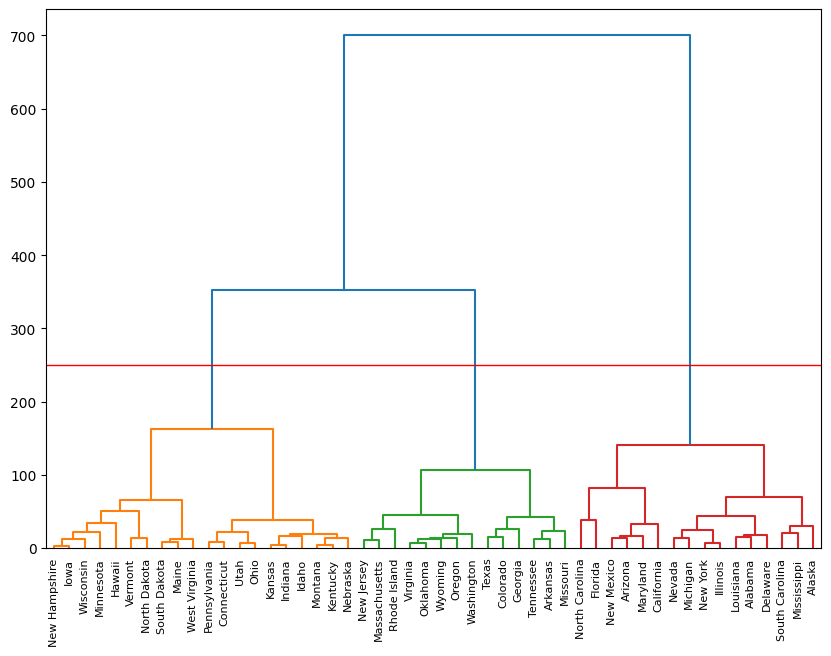

In [154]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

ward = linkage(us.iloc[:, 1:], metric='euclidean', method='ward')
plt.figure(figsize=(10, 7))
label_list = us['State'].tolist()
dendrogram(ward, orientation='top',
          labels=label_list,
          distance_sort='descending',
          color_threshold=250,
          show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [155]:
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [156]:
us['cluster'] = assignments
us

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


1         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
3             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

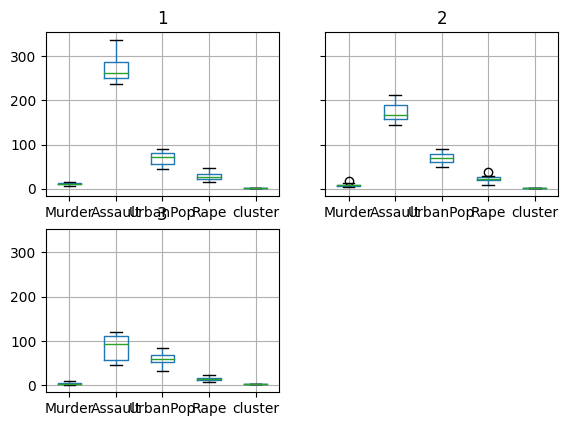

In [160]:
us.groupby('cluster').boxplot()

In [162]:
from mlxtend.frequent_patterns import apriori
from mlxtent.frequent_patterns import association_rules

import 

In [163]:
df = pd.read_csv('../data/groceries.csv')

In [164]:
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [168]:
df = df.iloc[:, 0].str.split(',', expand=True)
df.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [172]:
df_split_array = df.values
groceries = []

for i in range(len(df_split_array)):
    temp_list = list(filter(None, df_split_array[i]))
    groceries.append(temp_list)

groceries

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [179]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
groceries_tr = te.fit_transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns = te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
groceries_ap = apriori(groceries_tr, min_support=0.01, use_colnames=True)
groceries_ap

,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)
...,...,...
328,0.011999,"(whole milk, tropical fruit, root vegetables)"
329,0.014541,"(whole milk, yogurt, root vegetables)"
330,0.010474,"(whole milk, soda, yogurt)"
331,0.015152,"(whole milk, tropical fruit, yogurt)"


In [186]:
from mlxtend.frequent_patterns import association_rules
association_rules(groceries_ap, metric='confidence', min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,0.009574,1.292384
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,0.011669,1.332612
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,0.007844,1.251271
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,0.003836,1.166909
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,0.003299,1.153733
...,...,...,...,...,...,...,...,...,...
120,"(soda, yogurt)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,0.003484,1.206381
121,"(whole milk, tropical fruit)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,0.009250,1.340679
122,"(tropical fruit, yogurt)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,0.007668,1.542474
123,"(whole milk, whipped/sour cream)",(yogurt),0.032235,0.139516,0.010881,0.337539,2.419361,0.006383,1.298921


In [187]:
rules = association_rules(groceries_ap, metric='lift', min_threshold=1)
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))

In [188]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,0.009574,1.292384,1
1,(other vegetables),(beef),0.193512,0.052471,0.019727,0.101944,1.942869,0.009574,1.055089,1
2,(beef),(rolls/buns),0.052471,0.183954,0.013626,0.259690,1.411714,0.003974,1.102303,1
3,(rolls/buns),(beef),0.183954,0.052471,0.013626,0.074074,1.411714,0.003974,1.023331,1
4,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,0.011669,1.332612,1
...,...,...,...,...,...,...,...,...,...,...
593,"(whole milk, yogurt)",(whipped/sour cream),0.056030,0.071690,0.010881,0.194192,2.708777,0.006864,1.152024,2
594,"(whipped/sour cream, yogurt)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,0.005580,1.565664,2
595,(whole milk),"(whipped/sour cream, yogurt)",0.255542,0.020744,0.010881,0.042579,2.052539,0.005580,1.022805,1
596,(whipped/sour cream),"(whole milk, yogurt)",0.071690,0.056030,0.010881,0.151773,2.708777,0.006864,1.112874,1


In [189]:
data = pd.read_csv('../data/arima_data.csv', names=['day', 'price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [192]:
data['day'] = pd.to_datetime(data['day'])

In [193]:
data.set_index('day', inplace=True)
data

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298
2013-06-01,6739
2013-07-01,7107
2013-08-01,6492
2013-09-01,5693


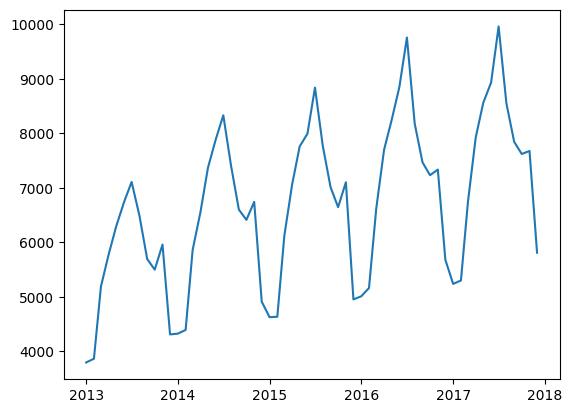

In [194]:
plt.plot(data)

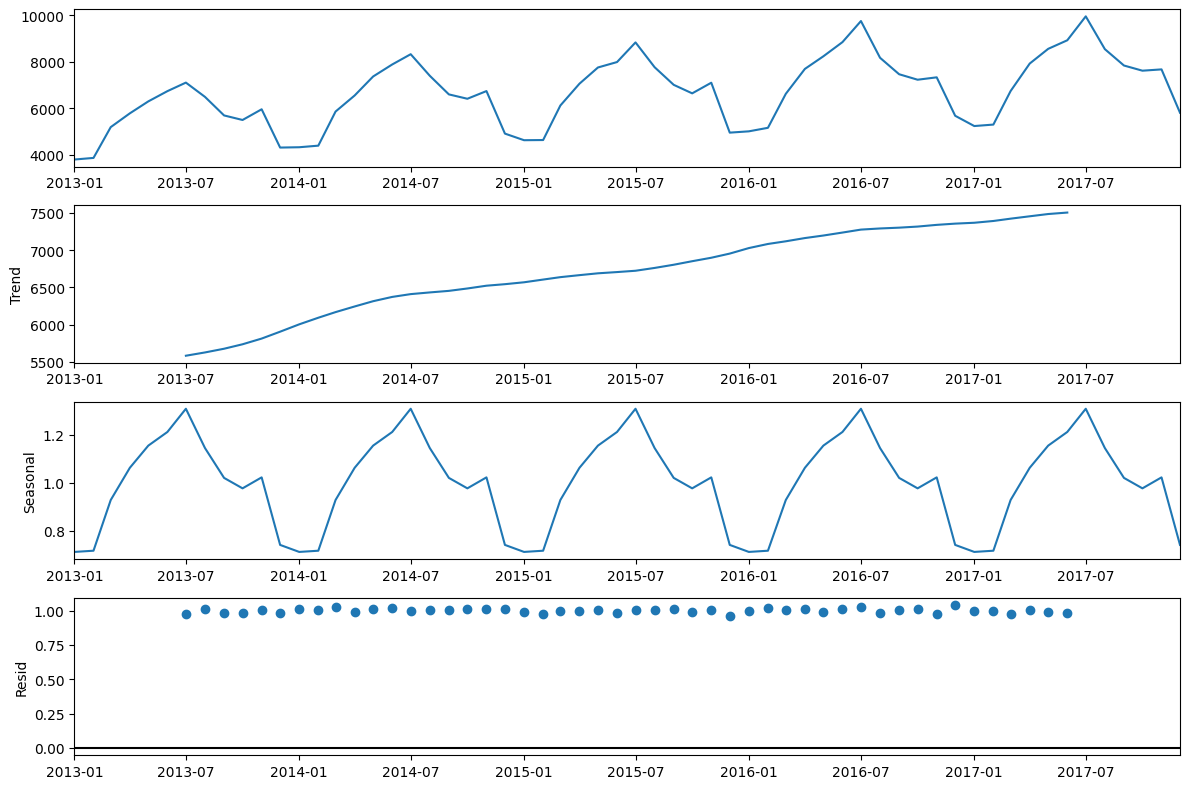

In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

In [199]:
from statsmodels.tsa.stattools import adfuller

train = data[:'2016-12-01']
test = data.drop(train.index)

adf = adfuller(train, regression='ct')
print('ADF \t {:.5f}'.format(adf[0]))
print('p-value \t {:.5f}'.format(adf[1]))

ADF 	 -1.99972
p-value 	 0.60159


<AxesSubplot:xlabel='day'>

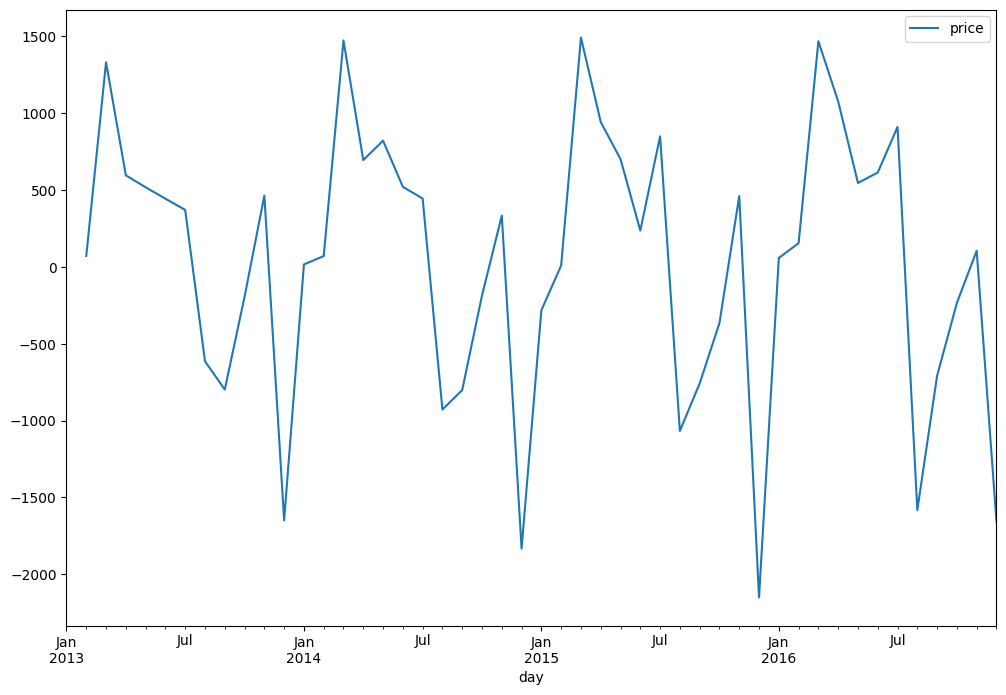

In [201]:
train.diff(1).plot()

In [202]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2, 1, 2))
res = model.fit()
res.summary()

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/iseongmin/opt/anaconda3/

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 26 Aug 2023   AIC                            761.750
Time:                        17:06:13   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3168      0.190     -6.944      0.000      -1.688      -0.945
ar.L2         -0.3192      0.190     -1.676      0.094      -0.692       0.054
ma.L1          1.9700      0.242      8.128      0.000       1.495       2.445
ma.L2          0.9950      0.241      4.129      0.000       0.523       1.467
sigma2      4.452e+05   1.13e-06   3.93e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.04e+27. Standard errors may be unstable.
"""

In [203]:
from pmdarima import auto_arima

In [205]:
auto_model = auto_arima(train, start_p=0, d=1, start_q=1,
                        max_p=3, max_q=3,
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.05 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=482.683, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=482.687, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.710 seconds


In [206]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 26 Aug 2023   AIC                            480.687
Time:                                     17:09:44   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""